In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Задаём набор состояний погоды и матрицу переходов между ними

In [8]:
state_wheather = ('sunny', 'cloudy', 'rainy')
transition_matrix = np.array(((0.6, 0.3, 0.1),
                              (0.3, 0.4, 0.3),
                              (0.2, 0.3, 0.5)))

#### Задание 1. Выберите произвольное начальное состояние и смоделируйте 20000 последующих состояний в цепи Маркова с введенной выше матрицей переходов. Результат моделирования (массив размера 20000) запишите в переменную states.

In [13]:
states = []
current_state = 'sunny'
for i in range(20000):
    current_state = np.random.choice(state_wheather, 1, p = transition_matrix[state_wheather.index(current_state)])[0]
    states.append(current_state)

#### Задание 2. На основе массива states рассчитайте, как меняется частота встречаемости каждого из типов погоды в массиве states[:n] для n, возрастающих от 1 до 20000. На одном рисунке покажите 3 графика: по оси х откладывайте n, по у - частоту для каждого из трех типов погоды.

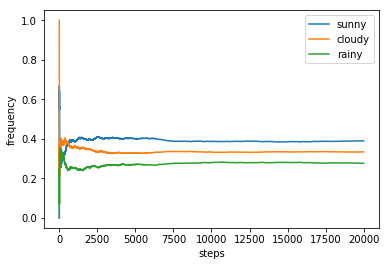

In [14]:
frequencies = np.zeros(60000).reshape(3,20000)
for j in range(20000) :
    frequencies[0][j] = states[:j+1].count(state_wheather[0])/(j+1)
    frequencies[1][j] = states[:j+1].count(state_wheather[1])/(j+1)
    frequencies[2][j] = 1- frequencies[0][j]- frequencies[1][j]
steps = list(range(1,20001))
sunny_days_freq = list(frequencies[0])
cloudy_days_freq = list(frequencies[1])
rainy_days_freq = list(frequencies[2])
plt.plot(steps,sunny_days_freq, label = 'sunny')
plt.plot(steps,cloudy_days_freq, label = 'cloudy')
plt.plot(steps,rainy_days_freq, label = 'rainy')
plt.xlabel('steps')
plt.ylabel('frequency')
plt.legend()
plt.show()

#### Задание 3. Как следует из картинки, частоты сходятся к некоторым стационарным значениям. Убедитесь, что эти значения совпадают с решением уравнения на стационарную плотность πP=π, где P - это матрица переходных вероятностей (transition_matrix), а вектор π - искомая стационарная плотность. Дополнительно убедитесь, это этот же вектор возникает в строках матрицы P, при возведении ее во все большие степени.

Взглянем на график, убрав первые 5000 наблюдений, чтобы точнее увидеть, к чему сходятся частоты разных состояний погоды.

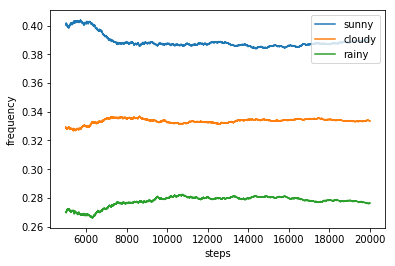

In [22]:
plt.plot(steps[5000:],sunny_days_freq[5000:], label = 'sunny')
plt.plot(steps[5000:],cloudy_days_freq[5000:], label = 'cloudy')
plt.plot(steps[5000:],rainy_days_freq[5000:], label = 'rainy')
plt.xlabel('steps')
plt.ylabel('frequency')
plt.legend()
plt.show()

Мы видим, что пределы частот равны примерно 0.39, 0.33 и 0.28 для солнечной, пасмурной и дождливой погоды соответственно. Теперь "проверим гармонию алгеброй", решив уравнение πP=π. Перепишем его в виде (P* - E)π* =0 и посмотрим на матрицу P* -E.

In [18]:
A = transition_matrix.T-np.eye(3)
print(A)

[[-0.4  0.3  0.2]
 [ 0.3 -0.6  0.3]
 [ 0.1  0.3 -0.5]]


Видно, что матрица вырожденная (сумма строк равна нулю), и это неудивительно, ведь уравнение однородное, а компоненты стационарной плотности должны удовлетворять ещё одному неодородному уравнению (их сумма равна 1). Заменим первое уравнение системы на π1+π2+π3=1 и найдём решение.

In [19]:
A[0] = [1,1,1]
print(np.linalg.solve(A,np.array([1,0,0]).T))

[0.38888889 0.33333333 0.27777778]


Осталось убедиться, что те же числа возникают в больших степенях матрицы переходов.

In [23]:
print(np.linalg.matrix_power(transition_matrix,50))

[[0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]]


#### Задание 4. Примените алгоритм Metropolis для генерации выборки из смеси двух гауссиан. Плотность смеси задается в виде p(x) = 0.3N(-4, 2) + 0.7N(3, 6), где N(a, b) - плотность нормального распределения со средним a и дисперсией b. Покажите, что гистограмма, построенная по выборке, приближает заданную плотность смеси.

In [24]:
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        if np.random.rand() < p:
            current = proposed
        post.append(current)
    return post[nburn::5]

In [28]:
value = lambda x: 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)
proposal = lambda x: x + 2*np.random.rand()-1
post = metroplis(0,value,proposal,20000)

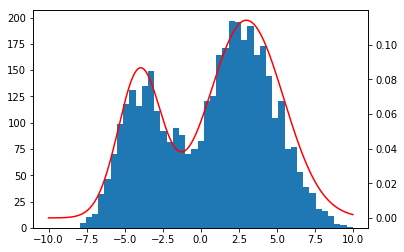

In [29]:
plt.hist(post, bins = np.linspace(-10,10,50))
plt.twinx()
x = np.linspace(-10, 10, 1000)
y = 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)
plt.plot(x, y, color = 'red')
plt.show()